# contextlib
用来编写上下文的，从而实现自动化和方便的作用

In [3]:
# exmaple，with open
with open("./asset/test.py", "r") as f:
    data = f.readline()
print(data)

import unittest



实现上下文管理是通过__enter__和__exit__这两个方法实现的。例如，下面的class实现了这两个方法：

In [4]:
class Person():
    def __init__(self, name):
        self.name = name
    def __enter__(self):
        print("enter Person")
        return self
    def __exit__(self, exc_type, exc_value, trackback):
        if exc_type:
            print("error exit")
        else:
            print("exit Person")
    def run(self):
        print("{} run away!".format(self.name))

me = Person("andrew")

In [7]:
with Person("andrew") as me:
    me.run()

enter Person
andrew run away!
exit Person


编写__enter__和__exit__仍然很繁琐，因此Python的标准库contextlib提供了更简单的写法，上面的代码可以改写如下：

In [8]:
from contextlib import contextmanager
class Person():
    def __init__(self, name):
        self.name = name

    def run(self):
        print("{} run away!".format(self.name))

@contextmanager
def create_person(name):
    print("enter")
    yield Person(name)
    print("exit")

with create_person("andrew") as me:
    me.run()

enter
andrew run away!
exit


如果一个对象没有实现上下文，我们就不能把它用于with语句。这个时候，可以用closing()来把该对象变为上下文对象。例如，用with语句使用urlopen()：
closing也是一个经过@contextmanager装饰的generator，这个generator编写起来其实非常简单：

# urllib
urllib提供了一系列用于操作URL的功能。
## get
urllib的request模块可以非常方便地抓取URL内容，也就是发送一个GET请求到指定的页面，然后返回HTTP的响应

In [18]:
# get something
from urllib import request

with request.urlopen('https://www.baidu.com') as f:
    data = f.read()
    print('Status:', f.status, f.reason)
#     for k, v in f.getheaders():
#         print('%s: %s' % (k, v))
    print('Data:', data.decode('utf-8'))

Status: 200 OK
Data: <!DOCTYPE html>
<!--STATUS OK-->
























































	
































	
        
			        
	
			        
	
			        
	
			        
			    

	
        
			        
	
			        
	
			        
	
			        
			    
























<html>
<head>
    
    <meta http-equiv="content-type" content="text/html;charset=utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge">
	<meta content="always" name="referrer">
    <meta name="theme-color" content="#2932e1">
    <link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
    <link rel="search" type="application/opensearchdescription+xml" href="/content-search.xml" title="百度搜索" />
    <link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu_85beaf5496f291521eb75ba38eacbd87.svg">
	
	
	<link rel="dns-prefetch" href="//s1.bdstatic.com"/>
	<link rel="dns-prefetch" href="//t1.baidu.com"/>
	<link rel="dns-prefetch" href="//t2.baidu.com"/

Status: 200 OK
Cache-Control: no-cache
Content-Type: text/html;charset=utf-8
Coremonitorno: 0
Date: Sun, 18 Aug 2019 05:13:23 GMT
P3p: CP=" OTI DSP COR IVA OUR IND COM "
Server: apache
Set-Cookie: BAIDUID=3C255A7CF234FC58D973C1ACAC5F3E05:FG=1; max-age=31536000; expires=Mon, 17-Aug-20 05:13:23 GMT; domain=.baidu.com; path=/; version=1; comment=bd
Set-Cookie: H_WISE_SIDS=132694_125704_133106_134860_114178_128142_120197_134837_132909_133046_131247_132439_130762_132378_131517_118891_118868_118849_118820_118788_107318_132783_134394_122034_133352_134796_132553_129653_132250_127026_131861_128967_133473_133838_133847_132552_133288_134460_134319_134047_134214_129643_131423_134601_134028_134775_110085_131574_127969_131755_131296_127316_127417_134151_132467_134349; path=/; expires=Mon, 17-Aug-20 05:13:23 GMT; domain=.baidu.com
Set-Cookie: bd_traffictrace=181313; expires=Thu, 08-Jan-1970 00:00:00 GMT
Set-Cookie: rsv_i=cda1ulwjlT5OHeWE4K0PaNUQ48PR4QDR854ZAkvBfhLPOI9oA5HdJuaPMa6t74I4G9JiDi2wVqCpuGDs
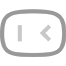
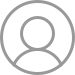
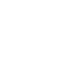
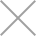
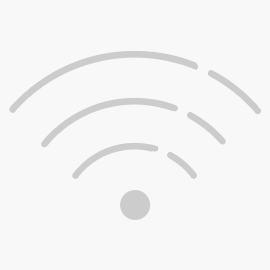
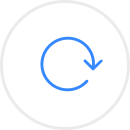
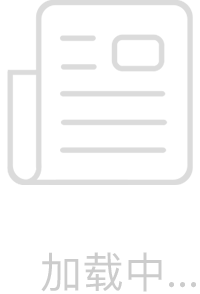
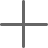
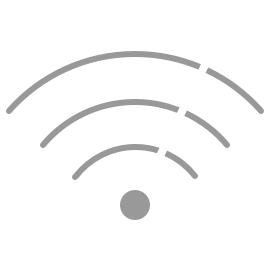
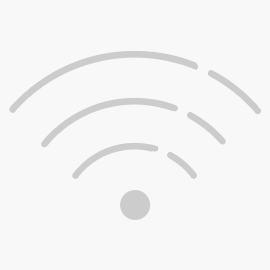
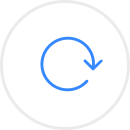

In [20]:
from urllib import request

req = request.Request('http://www.baidu.com/')
req.add_header('User-Agent', 'Mozilla/6.0 (iPhone; CPU iPhone OS 8_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/8.0 Mobile/10A5376e Safari/8536.25')
with request.urlopen(req) as f:
    print('Status:', f.status, f.reason)
    for k, v in f.getheaders():
        print('%s: %s' % (k, v))
    print('Data:', f.read().decode('utf-8'))

## post


In [21]:
from urllib import request, parse

print('Login to weibo.cn...')
email = input('Email: ')
passwd = input('Password: ')
login_data = parse.urlencode([
    ('username', email),
    ('password', passwd),
    ('entry', 'mweibo'),
    ('client_id', ''),
    ('savestate', '1'),
    ('ec', ''),
    ('pagerefer', 'https://passport.weibo.cn/signin/welcome?entry=mweibo&r=http%3A%2F%2Fm.weibo.cn%2F')
])

req = request.Request('https://passport.weibo.cn/sso/login')
req.add_header('Origin', 'https://passport.weibo.cn')
req.add_header('User-Agent', 'Mozilla/6.0 (iPhone; CPU iPhone OS 8_0 like Mac OS X) AppleWebKit/536.26 (KHTML, like Gecko) Version/8.0 Mobile/10A5376e Safari/8536.25')
req.add_header('Referer', 'https://passport.weibo.cn/signin/login?entry=mweibo&res=wel&wm=3349&r=http%3A%2F%2Fm.weibo.cn%2F')

with request.urlopen(req, data=login_data.encode('utf-8')) as f:
    print('Status:', f.status, f.reason)
    for k, v in f.getheaders():
        print('%s: %s' % (k, v))
    print('Data:', f.read().decode('utf-8'))

Login to weibo.cn...
Email: zixiang0706@163.com
Password: zi0706224
Status: 200 OK
Server: nginx/1.6.1
Date: Sun, 18 Aug 2019 05:15:01 GMT
Content-Type: text/html
Transfer-Encoding: chunked
Connection: close
Vary: Accept-Encoding
Cache-Control: no-cache, must-revalidate
Expires: Sat, 26 Jul 1997 05:00:00 GMT
Pragma: no-cache
Access-Control-Allow-Origin: https://passport.weibo.cn
Access-Control-Allow-Credentials: true
DPOOL_HEADER: dryad51
Set-Cookie: login=1b2cba5e6e3d73402c30c92ed64e338a; Path=/
SINA-LB: aGEuOTAuZzEucXhnLmxiLnNpbmFub2RlLmNvbQ==
SINA-TS: YjFjYTk0Y2UgMCAwIDAgNiA3ODcK
Data: {"retcode":50011002,"msg":"\u7528\u6237\u540d\u6216\u5bc6\u7801\u9519\u8bef","data":{"username":"zixiang0706@163.com","errline":661}}


In [22]:
from xml.parsers.expat import ParserCreate

class DefaultSaxHandler(object):
    def start_element(self, name, attrs):
        print('sax:start_element: %s, attrs: %s' % (name, str(attrs)))

    def end_element(self, name):
        print('sax:end_element: %s' % name)

    def char_data(self, text):
        print('sax:char_data: %s' % text)

xml = r'''<?xml version="1.0"?>
<ol>
    <li><a href="/python">Python</a></li>
    <li><a href="/ruby">Ruby</a></li>
</ol>
'''

handler = DefaultSaxHandler()
parser = ParserCreate()
parser.StartElementHandler = handler.start_element
parser.EndElementHandler = handler.end_element
parser.CharacterDataHandler = handler.char_data
parser.Parse(xml)

sax:start_element: ol, attrs: {}
sax:char_data: 

sax:char_data:     
sax:start_element: li, attrs: {}
sax:start_element: a, attrs: {'href': '/python'}
sax:char_data: Python
sax:end_element: a
sax:end_element: li
sax:char_data: 

sax:char_data:     
sax:start_element: li, attrs: {}
sax:start_element: a, attrs: {'href': '/ruby'}
sax:char_data: Ruby
sax:end_element: a
sax:end_element: li
sax:char_data: 

sax:end_element: ol


1

In [23]:
from html.parser import HTMLParser
from html.entities import name2codepoint

class MyHTMLParser(HTMLParser):

    def handle_starttag(self, tag, attrs):
        print('<%s>' % tag)

    def handle_endtag(self, tag):
        print('</%s>' % tag)

    def handle_startendtag(self, tag, attrs):
        print('<%s/>' % tag)

    def handle_data(self, data):
        print(data)

    def handle_comment(self, data):
        print('<!--', data, '-->')

    def handle_entityref(self, name):
        print('&%s;' % name)

    def handle_charref(self, name):
        print('&#%s;' % name)

parser = MyHTMLParser()
parser.feed('''<html>
<head></head>
<body>
<!-- test html parser -->
    <p>Some <a href=\"#\">html</a> HTML&nbsp;tutorial...<br>END</p>
</body></html>''')

<html>


<head>
</head>


<body>


<!--  test html parser  -->

    
<p>
Some 
<a>
html
</a>
 HTML tutorial...
<br>
END
</p>


</body>
</html>
